In [1]:
import os
import numpy as np
from pdf2image import convert_from_path
from PIL import Image

from decimer_segmentation import (
    segment_chemical_structures,
    segment_chemical_structures_from_file,
)

Instructions for updating:
Use fn_output_signature instead


## Define pdf path and convert to image

Please uncomment according to the system you are using. 
If you are using Windows, make sure, poppler is installed properly.
On Linux and MacOS, this should work properly without any problems. 

#### Uncomment below according to your needs. 

In [2]:
from pathlib import Path
from PyPDF2 import PdfWriter, PdfReader


def pdf_extract(pdf, segments, together=False):
    """
    pdf: str | Path
    segments: [(start, end), {'start': int, 'end': int}]
    """
    pdf_writer = PdfWriter()
    with open(pdf, "rb") as read_stream:
        pdf_reader = PdfReader(read_stream)
        pdf_writer_segment = PdfWriter()
        for segment in segments:
            # support {'start': 3, 'end': 3} or (start, end)
            try:
                start_page, end_page = segment["start"], segment["end"]
            except TypeError:
                start_page, end_page = segment
            for page_num in range(start_page - 1, end_page):
                if together:
                    pdf_writer.add_page(pdf_reader.pages[page_num])
                else:
                    pdf_writer_segment.add_page(pdf_reader.pages[page_num])
            p = Path(pdf)
            if not together:
                ouput = p.parent / p.with_stem(
                    f"{p.stem}_pages_{start_page}-{end_page}"
                )
                with open(ouput, "wb") as out:
                    pdf_writer_segment.write(out)
    if together:
        ouput = p.parent / p.with_stem(f"{p.stem}_extracted")
        with open(ouput, "wb") as out:
            pdf_writer.write(out)


# path: str = os.path.abspath("./Validation/TW215080B.pdf")
path: str = os.path.abspath("./Validation/KR102075885B1.pdf")
pdf_extract(path, [(10, 20)])

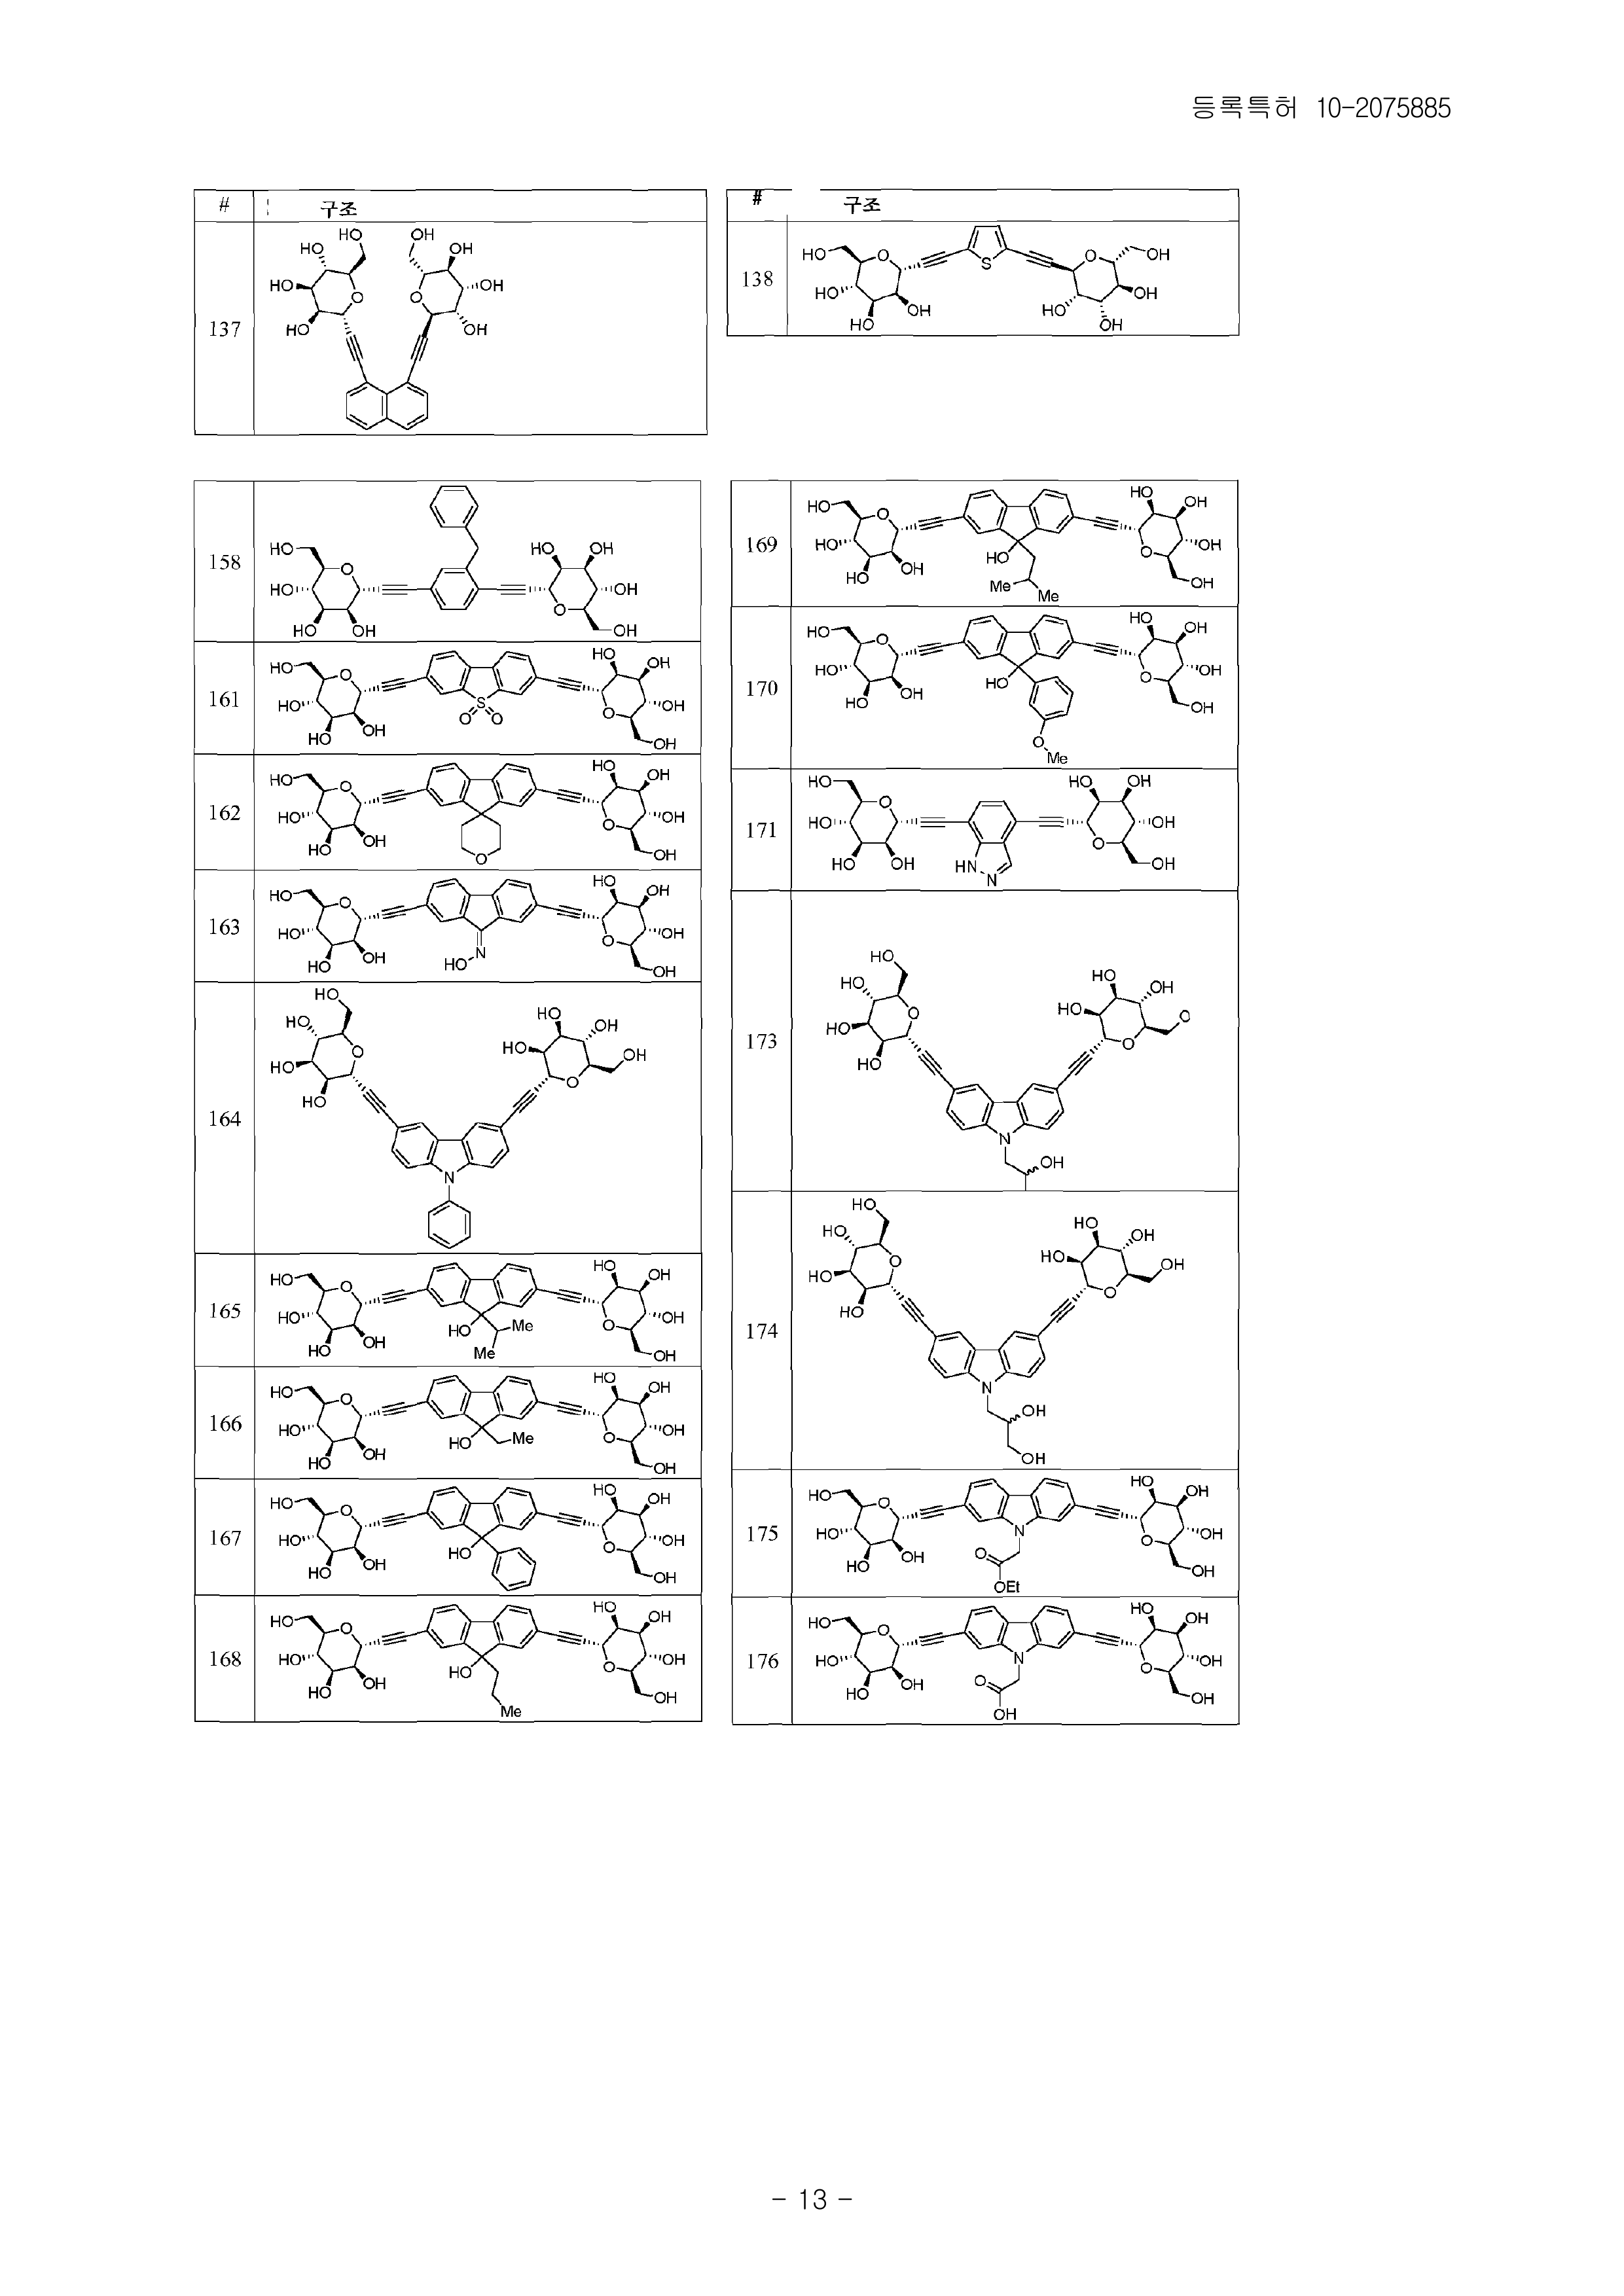

In [2]:
path: str = os.path.abspath("./Validation/test_page.pdf")
path: str = os.path.abspath("./Validation/page 35.pdf")
path: str = os.path.abspath("./Validation/TW215080B_pages_45-55.pdf")
path: str = os.path.abspath("./Validation/KR102075885B1_pages_10-20.pdf")

# If you are using Windows, make sure to have poppler installed and show pdf2image where to find it.
poppler_path = "C:\\Program Files (x86)\\poppler-0.68.0\\bin"  # CHANGE PATH
pages = convert_from_path(path, 300, poppler_path=poppler_path)

# If you are using Linux or MacOS, this should hopefully have been installed via conda/pip.
# In that case, you just run:
# pages = convert_from_path(path, 500)
pages[3]

In [2]:
pages[3]

NameError: name 'pages' is not defined

## Run the detection using the Mask R CNN model

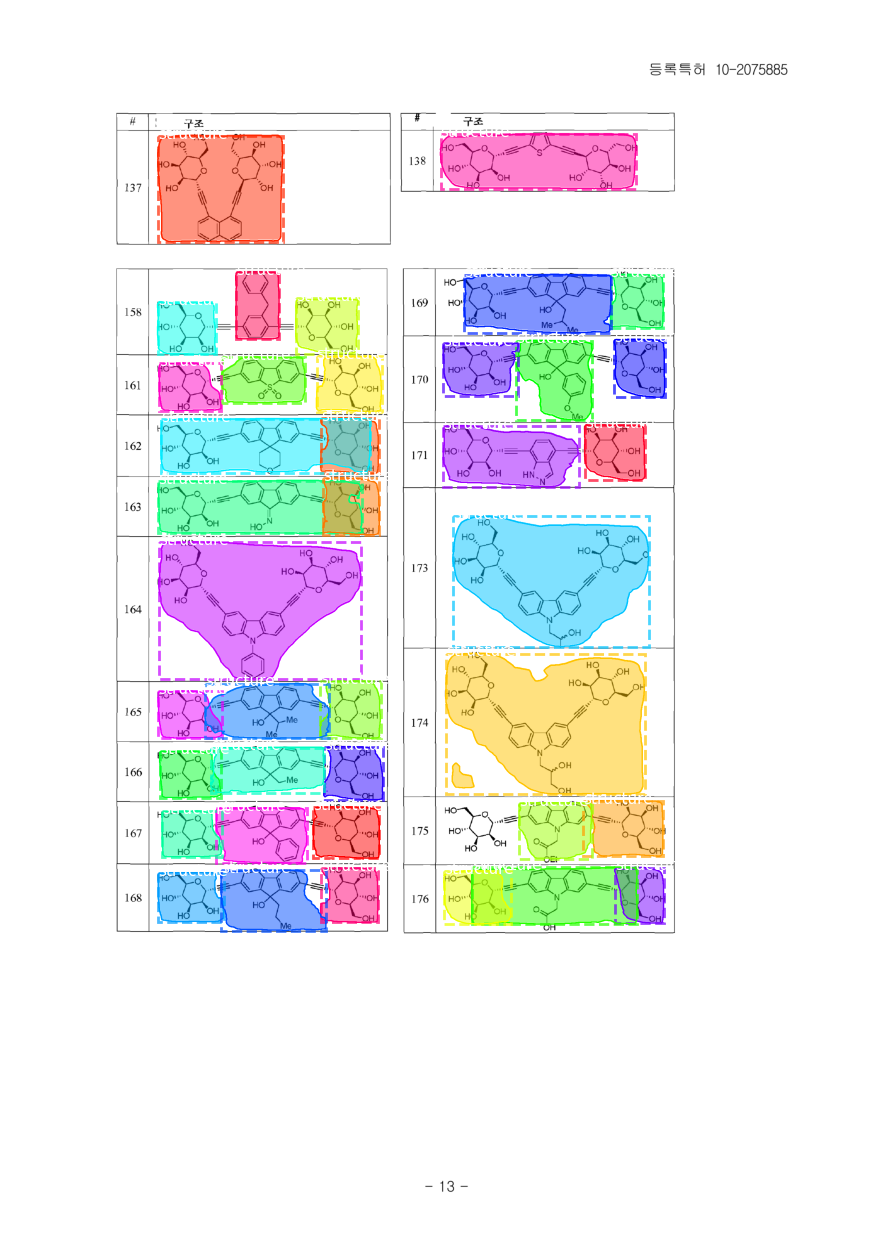

In [4]:
segments = segment_chemical_structures(
    np.array(pages[3]), expand=False, visualization=True
)

## Run DECIMER Segmentation with the mask expansion


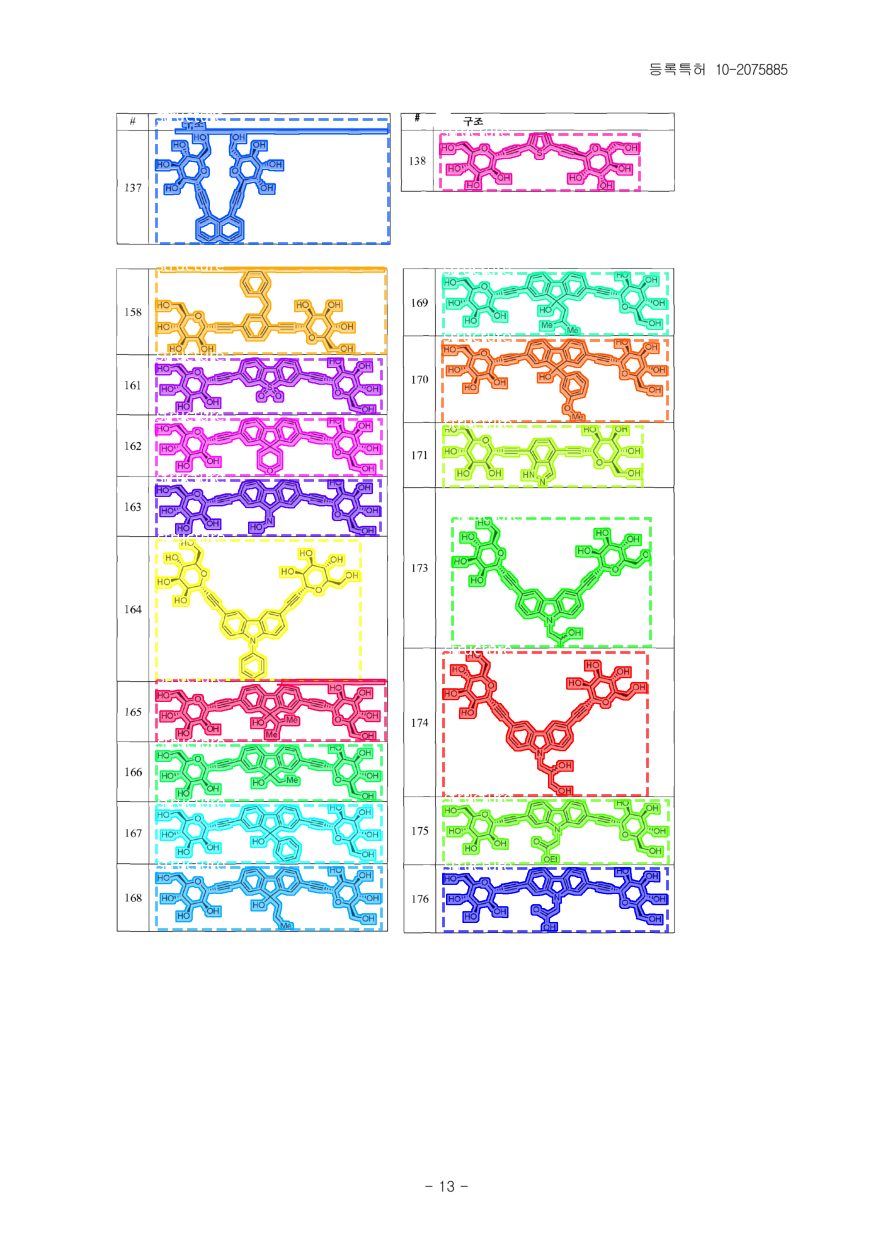

In [3]:
segments = segment_chemical_structures(
    np.array(pages[3]), expand=True, visualization=True
)

## Run DECIMER Segmentation directly on a file

If you run it on a pdf_file on Windows, you may need to adapt the poppler_path argument of segment_chemical_structures_from_file. If the poppler installation is not found, it tries to find it at "C:\\Program Files (x86)\\poppler-0.68.0\\bin". If you have installed poppler elsewhere, please adapt the path.

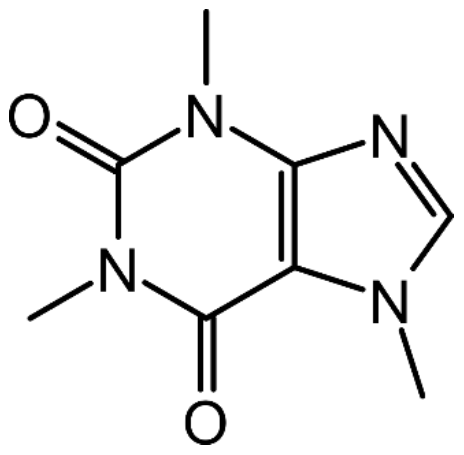

In [4]:
path = os.path.abspath("./Validation/test_page.pdf")
segments = segment_chemical_structures_from_file(path, expand=True, poppler_path=None)
# Show first segment
Image.fromarray(segments[0])